# Template Notebook

## Setup

### Standard library imports

In [1]:
%load_ext autoreload

In [2]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

In [3]:
%autoreload 2

import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from source.spea_optimizer import SPEAOptimizer

In [4]:
sns.set()

### Setup objective function

In [5]:
A1 = 0.5*np.sin(1.0) - 2.0*np.cos(1.0) + 1.0*np.sin(2.0) - 1.5*np.cos(2.0)
A2 = 1.5*np.sin(1.0) - 1.0*np.cos(1.0) + 2.0*np.sin(2.0) - 0.5*np.cos(2.0)

def objective(array):
    x, y = array
    
    B1 = 0.5*np.sin(x) - 2.0*np.cos(x) + 1.0*np.sin(y) - 1.5*np.cos(y)
    B2 = 1.5*np.sin(x) - 1.0*np.cos(x) + 2.0*np.sin(y) - 0.5*np.cos(y)
    
    f1 = 1 + np.power(A1 - B1, 2) + np.power(A2 - B2, 2)
    f2 = np.power(x+3, 2) + np.power(y+1, 2)
    return np.array([f1, f2])

In [23]:
x_t, y_t = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100), sparse=False, indexing='ij')

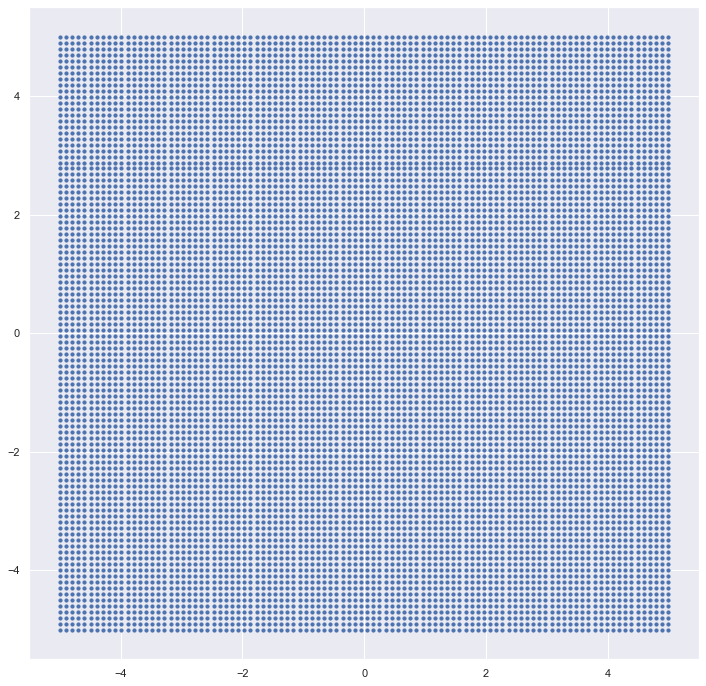

In [24]:
plt.figure(figsize=[12, 12])

plt.scatter(x_t, y_t, c="b", s=10)

In [37]:
grid = np.array([x_t, y_t])
grid = grid.reshape(2, 100*100)
grid = np.swapaxes(grid, 0, 1)
grid.shape

(10000, 2)

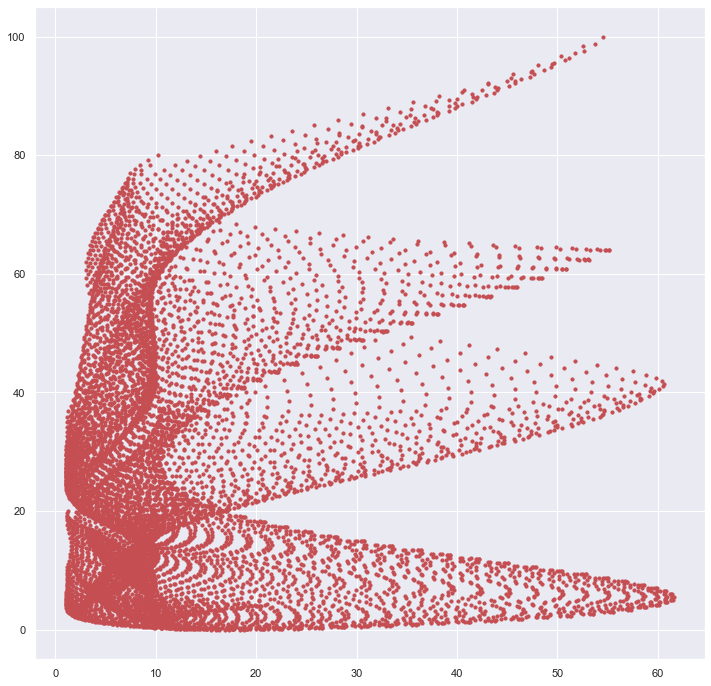

In [43]:
plt.figure(figsize=[12, 12])

values = np.apply_along_axis(objective, 1, grid)
plt.scatter(values[:, 0], values[:, 1], c="r", s=10)

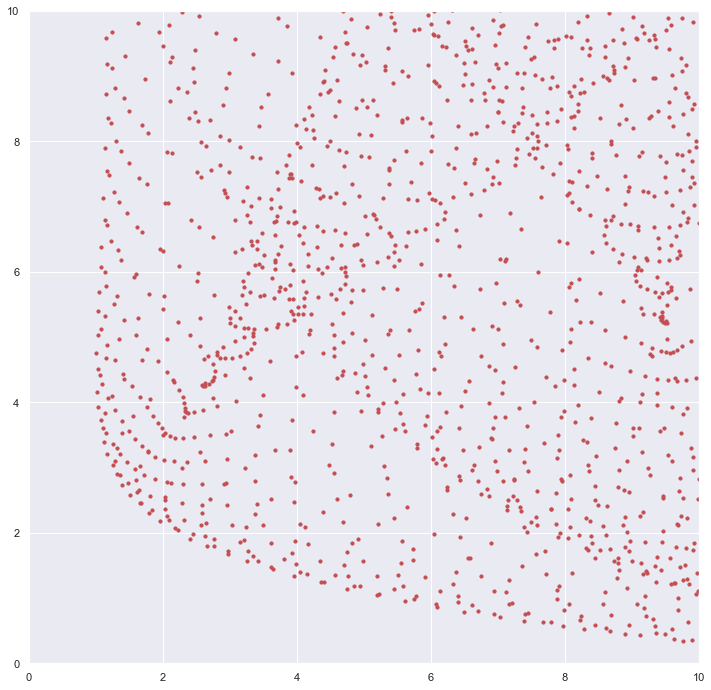

In [41]:
plt.figure(figsize=[12, 12])

values = np.apply_along_axis(objective, 1, grid)
plt.scatter(values[:, 0], values[:, 1], c="r", s=10)
_ = plt.xlim([0, 10])
_ = plt.ylim([0, 10])

In [12]:
optimzier = SPEAOptimizer(
    objective,
    n_dim=2,
    mode="min",
    mutation_operator="gaussian",
    crossover_operator="center",
    selection_operator="binary_tournament",
    clustering_method="affinity_propagation"
)

In [13]:
history = optimzier.optimize(
    generations=100,
    population_size=100,
    crossover_rate=0.8,
    mutation_rate=0.4,
    reducing_period=1,
    search_range=((-5, 10),),
    mutation_strength=1,
    clustering_parameters={"max_iter": 50},
    silent=False,
    mutation_schedule="const",
    crossover_schedule="const",
    strength_schedule=lambda generation, factor, n_generations: 1 + 0.05*generation,
    logging=False,
    logging_path="../data/poloni_logs_2.csv",
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.07it/s]


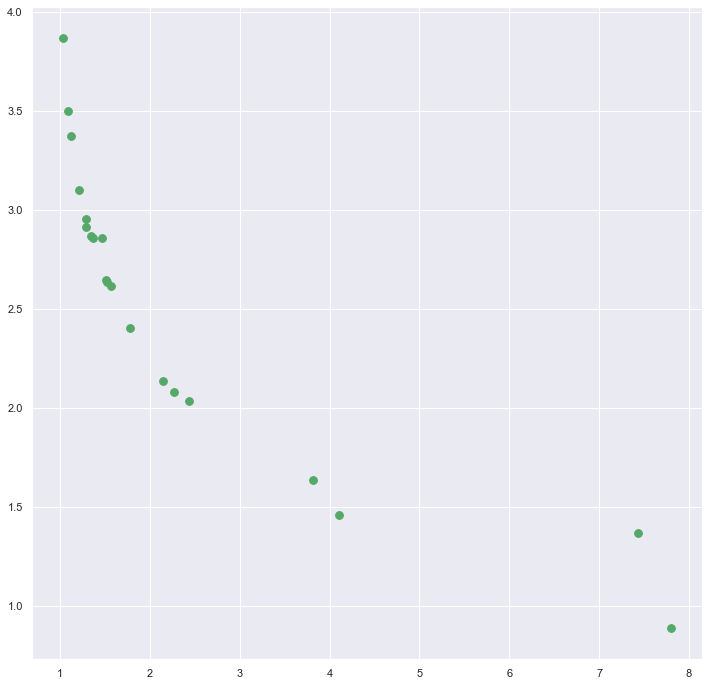

In [44]:
plt.figure(figsize=[12, 12])

values = np.apply_along_axis(objective, 1, optimzier.pareto_front)
plt.scatter(values[:, 0], values[:, 1], c="g", s=60)

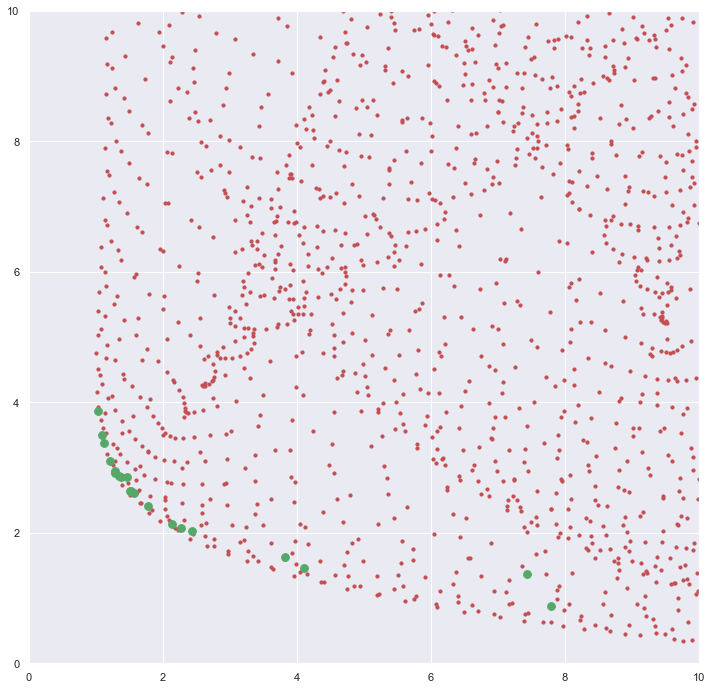

In [46]:
plt.figure(figsize=[12, 12])

values = np.apply_along_axis(objective, 1, grid)
pareto_values = np.apply_along_axis(objective, 1, optimzier.pareto_front)
plt.scatter(values[:, 0], values[:, 1], c="r", s=10)
plt.scatter(pareto_values[:, 0], pareto_values[:, 1], c="g", s=60)
_ = plt.xlim([0, 10])
_ = plt.ylim([0, 10])

In [49]:
optimzier.pareto_front.tolist()

[[-3.8990912434076335, 0.4314294478259223],
 [-3.6132776118337295, 0.5055062969036597],
 [-3.955628000778092, 0.3933418290310391],
 [-4.104674234459647, 0.6271769573795543],
 [-3.881766359379434, 0.47468967102646176],
 [-3.854075360018307, 0.3731256678275367],
 [-3.818400158573251, -0.5361044033336853],
 [-3.7626790549991274, 0.22308605414604182],
 [-3.6008945384201176, 0.5086677200630195],
 [-3.7934695724867455, 0.18576461679565265],
 [-3.8773508152422993, 0.4482046499751768],
 [-3.912813034336656, 0.5049535237104186],
 [-4.045966125437557, -0.47763756385972544],
 [-3.8202351344868277, 0.4960007152077868],
 [-4.012820807832203, 0.5723777792732666],
 [-3.963827228724539, 0.5633142970772711],
 [-3.80958993769641, 0.3225733290955223],
 [-3.7576321154001806, 0.24919093781052748],
 [-3.2172960783314988, 0.1871751215748072],
 [-3.837817491831827, -0.03323398815043255]]